# Lets start

Libraries

In [ ]:
!pip install dataprep

In [ ]:
import dataprep
from dataprep import eda
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.impute import SimpleImputer
from sklearn import preprocessing

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Load datasets

In [ ]:
# Get the train data
trainFile = "../input/cat-in-the-dat/train.csv"
trainDataset = pd.read_csv(trainFile)
print(trainDataset.shape)
# Get the test data
testFile = "../input/cat-in-the-dat/test.csv"
testDataset = pd.read_csv(testFile)
print(testDataset.shape)

In [ ]:
trainDataset

In [ ]:
testDataset

Analys

In [ ]:
eda.create_report(trainDataset, title="train data report")

In [ ]:
train_y = trainDataset['target'].values
trainDataset = trainDataset.drop('target',axis = 1)

In [ ]:
eda.plot_diff([trainDataset, testDataset])

# Data preparation

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
print(trainDataset.shape)
print(testDataset.shape)
ntrain = trainDataset.shape[0]
ntest = testDataset.shape[0]
all_data = pd.concat([trainDataset, testDataset])
print(all_data.shape)

In [ ]:
le = LabelEncoder()
for i in all_data.columns:
    all_data[i] = le.fit_transform(all_data[i])

print(all_data.shape)
all_data.head()

In [ ]:
sc = StandardScaler() 
all_data = sc.fit_transform(all_data)

In [ ]:
train = all_data[:ntrain]
test = all_data[ntrain:]
print(train.shape)
print(test.shape)

# Train

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
parameters = {'min_samples_leaf': [ 5],'max_depth': [7,10],'max_features': [7]}
rfc = RandomForestClassifier(n_estimators=200, random_state=42)
gcv = GridSearchCV(rfc, parameters,n_jobs=None, cv=5, verbose=3,scoring='roc_auc', return_train_score=True)
gcv.fit(train, train_y)
gcv.score(train, train_y)

In [ ]:
model=gcv.best_estimator_
model

In [ ]:
y_pred = model.predict_proba(test)

In [ ]:
sub = pd.DataFrame()
sub['id'] = testDataset['id']
sub['target'] = y_pred[:, 1]
sub.to_csv('submission.csv', index=False)

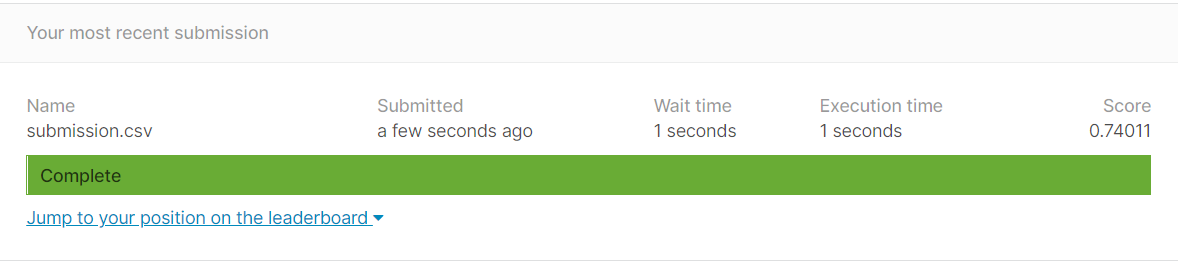